#### 1. Import Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import mean_squared_error

#### 2. Read Data

In [52]:
df_zillow = pd.read_csv('State_Zhvi_SingleFamilyResidence.csv')
df_zillow.head()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,9,California,1,161705.0,161250.0,160895.0,160863.0,161032.0,161336.0,161592.0,...,555303,556553,557704,558774,557899,557280,557356,559531,561859,565250
1,54,Texas,2,97690.0,97700.0,97726.0,97769.0,97876.0,98092.0,98349.0,...,204506,205082,205659,206227,206789,207307,207903,208173,208470,208656
2,43,New York,3,121143.0,120794.0,120428.0,120149.0,120041.0,120103.0,120237.0,...,268478,269589,270730,271569,272068,272336,272442,272525,272779,273294
3,14,Florida,4,104015.0,104082.0,104180.0,104288.0,104392.0,104506.0,104694.0,...,253080,253654,254112,254598,255099,255438,255799,256392,257286,258277
4,21,Illinois,5,138341.0,138263.0,138565.0,138632.0,138902.0,139382.0,139992.0,...,203134,203876,204259,204319,204182,203999,203745,203588,203471,203598


In [53]:
df_zillow.describe()

,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
count,51.000000,51.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.0000,47.000000,47.000000,...,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,33.137255,26.000000,115506.106383,115466.404255,115508.510638,115610.425532,115821.680851,116089.0000,116366.255319,116634.787234,...,257972.176471,258983.647059,259844.274510,260533.509804,260992.45098,261451.117647,261890.176471,262370.549020,262881.372549,263622.666667
std,17.260382,14.866069,38290.288140,37941.031729,37572.812434,37285.148392,37088.365465,36995.2633,36900.129673,36812.169143,...,131755.960462,132025.084224,132241.425244,132226.488618,131973.46884,131858.802610,131738.554809,131814.458888,131775.376273,131928.916587
min,3.000000,1.000000,61714.000000,61792.000000,61762.000000,61619.000000,61532.000000,61533.0000,61602.000000,61736.000000,...,105308.000000,105720.000000,106094.000000,106429.000000,106746.00000,107057.000000,107446.000000,107783.000000,107725.000000,107601.000000
25%,19.500000,13.500000,87357.500000,87606.500000,88030.000000,88501.500000,88978.500000,89355.0000,89749.500000,90199.000000,...,167848.500000,168825.500000,169882.500000,170814.500000,171565.50000,172041.500000,172469.500000,172849.500000,173258.500000,173613.000000
50%,34.000000,26.000000,107893.000000,107704.000000,107798.000000,107577.000000,107534.000000,107923.0000,106847.000000,106464.000000,...,238054.000000,238212.000000,238354.000000,238863.000000,239356.00000,239886.000000,240522.000000,241093.000000,241657.000000,242755.000000
75%,46.500000,38.500000,135471.500000,135726.000000,136219.000000,136665.000000,137182.000000,137807.0000,138549.000000,139338.500000,...,296826.000000,298139.500000,299682.000000,300769.500000,301779.00000,301945.500000,302114.500000,302309.000000,303522.500000,304703.500000
max,62.000000,51.000000,260755.000000,258151.000000,255146.000000,252456.000000,250434.000000,249246.0000,247826.000000,246702.000000,...,728142.000000,731680.000000,735646.000000,736741.000000,735314.00000,735427.000000,735861.000000,737124.000000,737315.000000,738025.000000


#### 3. Data Manipulation

In [54]:
# Remove unnecessary columns
df_zillow = df_zillow.drop(['RegionID','SizeRank'],axis = 1)
df_zillow.head()

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,California,161705.0,161250.0,160895.0,160863.0,161032.0,161336.0,161592.0,161715.0,161882.0,...,555303,556553,557704,558774,557899,557280,557356,559531,561859,565250
1,Texas,97690.0,97700.0,97726.0,97769.0,97876.0,98092.0,98349.0,98585.0,98817.0,...,204506,205082,205659,206227,206789,207307,207903,208173,208470,208656
2,New York,121143.0,120794.0,120428.0,120149.0,120041.0,120103.0,120237.0,120388.0,120553.0,...,268478,269589,270730,271569,272068,272336,272442,272525,272779,273294
3,Florida,104015.0,104082.0,104180.0,104288.0,104392.0,104506.0,104694.0,104934.0,105210.0,...,253080,253654,254112,254598,255099,255438,255799,256392,257286,258277
4,Illinois,138341.0,138263.0,138565.0,138632.0,138902.0,139382.0,139992.0,140584.0,141113.0,...,203134,203876,204259,204319,204182,203999,203745,203588,203471,203598


In [55]:
# Transpose the data and create a year column
df_zillow = df_zillow.transpose()
df_zillow.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
RegionName,California,Texas,New York,Florida,Illinois,Pennsylvania,Ohio,Michigan,Georgia,North Carolina,...,New Hampshire,Rhode Island,Montana,Delaware,South Dakota,Alaska,North Dakota,Vermont,District of Columbia,Wyoming
1996-04,161705,97690,121143,104015,138341,95563,92759,90418,102771,110287,...,109218,128266,NaN,130926,84357,130739,NaN,109810,194072,NaN
1996-05,161250,97700,120794,104082,138263,95303,93018,90962,103039,110589,...,109267,127809,NaN,130753,84009,131374,NaN,109475,192427,NaN
1996-06,160895,97726,120428,104180,138565,95173,93255,91478,103370,111021,...,109546,127456,NaN,130964,84356,132063,NaN,109166,190747,NaN
1996-07,160863,97769,120149,104288,138632,95092,93474,91929,103708,111545,...,110013,127224,NaN,131683,84732,132408,NaN,108909,189419,NaN


In [56]:
# Make the first row as column name
df_zillow.columns = df_zillow.iloc[0]
df_zillow = df_zillow[1:]
df_zillow.head()

RegionName,California,Texas,New York,Florida,Illinois,Pennsylvania,Ohio,Michigan,Georgia,North Carolina,...,New Hampshire,Rhode Island,Montana,Delaware,South Dakota,Alaska,North Dakota,Vermont,District of Columbia,Wyoming
1996-04,161705,97690,121143,104015,138341,95563,92759,90418,102771,110287,...,109218,128266,NaN,130926,84357,130739,NaN,109810,194072,NaN
1996-05,161250,97700,120794,104082,138263,95303,93018,90962,103039,110589,...,109267,127809,NaN,130753,84009,131374,NaN,109475,192427,NaN
1996-06,160895,97726,120428,104180,138565,95173,93255,91478,103370,111021,...,109546,127456,NaN,130964,84356,132063,NaN,109166,190747,NaN
1996-07,160863,97769,120149,104288,138632,95092,93474,91929,103708,111545,...,110013,127224,NaN,131683,84732,132408,NaN,108909,189419,NaN
1996-08,161032,97876,120041,104392,138902,95196,93753,92430,104043,112121,...,110428,127174,NaN,132360,84867,133117,NaN,108794,188338,NaN


In [57]:
df_zillow.iloc[0].index.name = ''
df_zillow.head()

,California,Texas,New York,Florida,Illinois,Pennsylvania,Ohio,Michigan,Georgia,North Carolina,...,New Hampshire,Rhode Island,Montana,Delaware,South Dakota,Alaska,North Dakota,Vermont,District of Columbia,Wyoming
1996-04,161705,97690,121143,104015,138341,95563,92759,90418,102771,110287,...,109218,128266,NaN,130926,84357,130739,NaN,109810,194072,NaN
1996-05,161250,97700,120794,104082,138263,95303,93018,90962,103039,110589,...,109267,127809,NaN,130753,84009,131374,NaN,109475,192427,NaN
1996-06,160895,97726,120428,104180,138565,95173,93255,91478,103370,111021,...,109546,127456,NaN,130964,84356,132063,NaN,109166,190747,NaN
1996-07,160863,97769,120149,104288,138632,95092,93474,91929,103708,111545,...,110013,127224,NaN,131683,84732,132408,NaN,108909,189419,NaN
1996-08,161032,97876,120041,104392,138902,95196,93753,92430,104043,112121,...,110428,127174,NaN,132360,84867,133117,NaN,108794,188338,NaN


In [58]:
# convert the Date index value from String to Datetime type
df_zillow.index = pd.to_datetime(df_zillow.index) 
df_zillow.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', length=285, freq=None)

In [59]:
df_zillow.index.name = 'Date'
df_zillow.head()

,California,Texas,New York,Florida,Illinois,Pennsylvania,Ohio,Michigan,Georgia,North Carolina,...,New Hampshire,Rhode Island,Montana,Delaware,South Dakota,Alaska,North Dakota,Vermont,District of Columbia,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
1996-04-01,161705,97690,121143,104015,138341,95563,92759,90418,102771,110287,...,109218,128266,NaN,130926,84357,130739,NaN,109810,194072,NaN
1996-05-01,161250,97700,120794,104082,138263,95303,93018,90962,103039,110589,...,109267,127809,NaN,130753,84009,131374,NaN,109475,192427,NaN
1996-06-01,160895,97726,120428,104180,138565,95173,93255,91478,103370,111021,...,109546,127456,NaN,130964,84356,132063,NaN,109166,190747,NaN
1996-07-01,160863,97769,120149,104288,138632,95092,93474,91929,103708,111545,...,110013,127224,NaN,131683,84732,132408,NaN,108909,189419,NaN
1996-08-01,161032,97876,120041,104392,138902,95196,93753,92430,104043,112121,...,110428,127174,NaN,132360,84867,133117,NaN,108794,188338,NaN


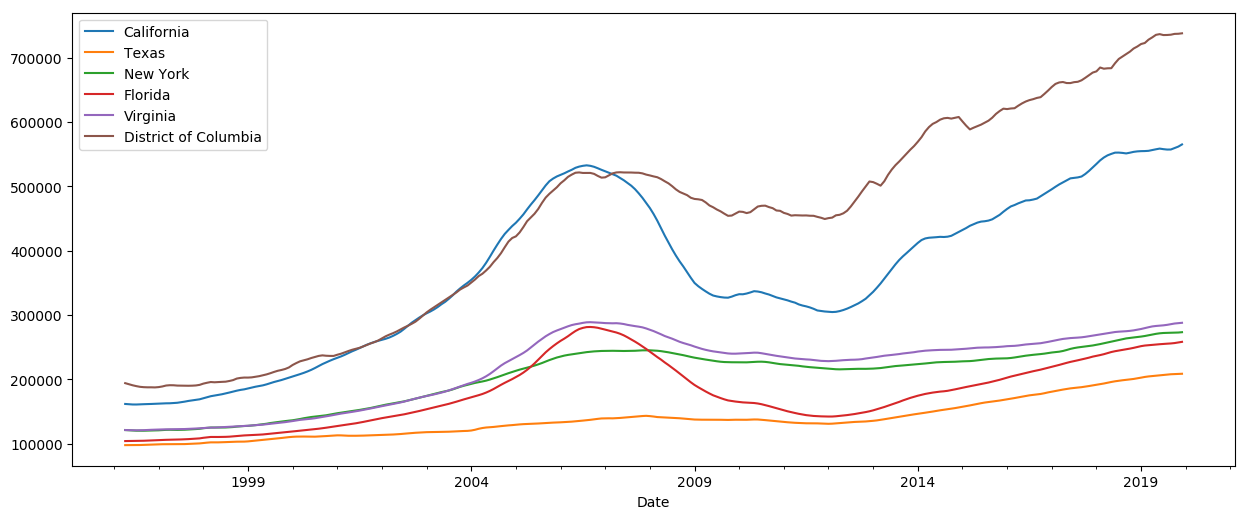

In [94]:
# Original Series
# Since I am interested in 6 states below, i will plot these 6 states here
selected_states = ['California','Texas','New York','Florida','Virginia','District of Columbia']
df_zillow[selected_states].plot(figsize=(15,6))

#### 4. Preparing for Time Series Analysis

##### 4.1 Calculate the Monthly Return 

Since median housing price is mostlikely not stationary(e.g. positive or negative trend), I will first try
the monthly return to see its stationary.

In [62]:
df_monthly_returns = df_zillow.pct_change()
df_monthly_returns.head()

,California,Texas,New York,Florida,Illinois,Pennsylvania,Ohio,Michigan,Georgia,North Carolina,...,New Hampshire,Rhode Island,Montana,Delaware,South Dakota,Alaska,North Dakota,Vermont,District of Columbia,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
1996-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-05-01,-0.002814,0.000102,-0.002881,0.000644,-0.000564,-0.002721,0.002792,0.006017,0.002608,0.002738,...,0.000449,-0.003563,NaN,-0.001321,-0.004125,0.004857,NaN,-0.003051,-0.008476,NaN
1996-06-01,-0.002202,0.000266,-0.003030,0.000942,0.002184,-0.001364,0.002548,0.005673,0.003212,0.003906,...,0.002553,-0.002762,NaN,0.001614,0.004131,0.005245,NaN,-0.002823,-0.008731,NaN
1996-07-01,-0.000199,0.000440,-0.002317,0.001037,0.000484,-0.000851,0.002348,0.004930,0.003270,0.004720,...,0.004263,-0.001820,NaN,0.005490,0.004457,0.002612,NaN,-0.002354,-0.006962,NaN
1996-08-01,0.001051,0.001094,-0.000899,0.000997,0.001948,0.001094,0.002985,0.005450,0.003230,0.005164,...,0.003772,-0.000393,NaN,0.005141,0.001593,0.005355,NaN,-0.001056,-0.005707,NaN


##### 4.2 ACF Stationary Plot

In [101]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def check_stationary_plot(selected_states):
    plt.rcParams.update({'figure.figsize':(9,9), 'figure.dpi':100})
    fig, axes = plt.subplots(2, 2, sharex=False)
    
    # 1st Differencing
    for state in selected_states:
        axes[0, 0].plot(df_monthly_returns[state]); axes[0, 0].set_title('1st Order Differencing')
        plot_acf(df_monthly_returns[state].dropna(),ax=axes[0, 1])
        #plot_pacf(df_monthly_returns[state].dropna(), ax=axes[0,2])
    
    # 2nd Differencing
    for state in selected_states:
        axes[1, 0].plot(df_monthly_returns[state].diff()); axes[1, 0].set_title('2nd Order Differencing')
        plot_acf(df_monthly_returns[state].diff().dropna(),ax=axes[1, 1])
        #plot_pacf(df_monthly_returns[state].diff().dropna(), ax=axes[1,2])
    plt.show()

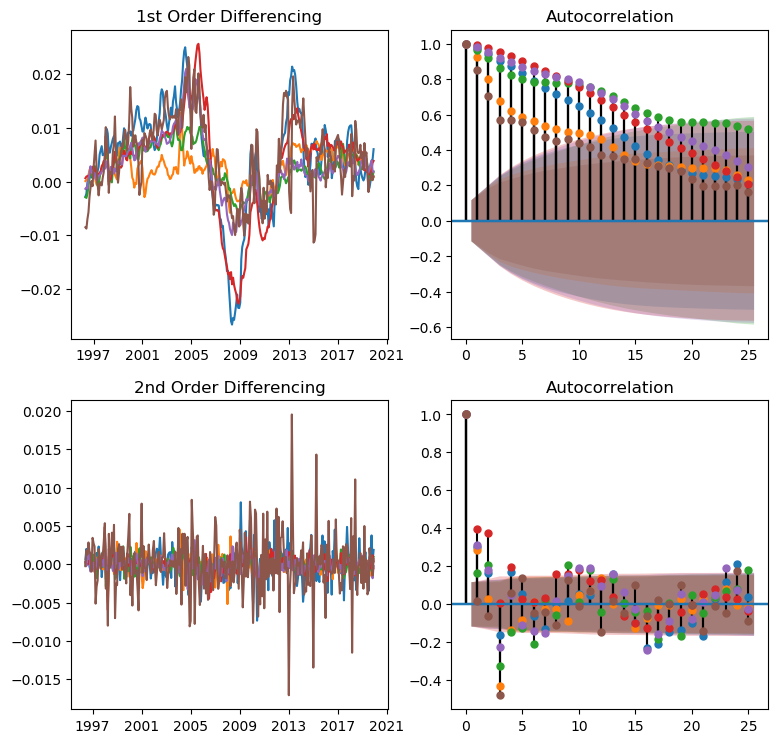

In [102]:
selected_states = ['California','Texas','New York','Florida','Virginia','District of Columbia']
check_stationary_plot(selected_states)

From this plot, we can see that ACF plot for the 1st order differencing(monthly return) is slowely decaying, which means that the future value is heavily dependent on the past value. And the mean and variance is not constant over time, thus it is not stationary. But the ACF for 2nd order differencing(difference between returns) shows most likely stationary. However, we can not just rely on a visual inspection which is not accurate enough to proceed with fitting an ARIMA model. Therefore, it is necessary to conduct an Augmented Dickey-Fuller test for stationarity.

##### 4.3 ADF Test with Number of Differencing

In ADF test, the null hypothesis is the time series possesses a unit root and is non-stationary. So, the P-Value in ADF test is less than the significance level (0.05), you reject the null hypothesis.

In [106]:
from statsmodels.tsa.stattools import adfuller

def ADFTest(selected_states,differencing):
    if differencing == 1:
            print('ADF Test with 1st Order Differencing (monthly return): ')
    else: print('ADF Test with Second Order Differencing : ')
        
    for state in selected_states:
        if differencing == 1:
            result = adfuller((df_monthly_returns[state].dropna()), autolag='AIC')
        elif differencing == 2:
            result = adfuller((df_monthly_returns[state].diff().dropna()), autolag='AIC')
        else: print('Please choose the number of differencing between 1 and 2.')
        print('\n'+ state +': ')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))

In [107]:
# 1st Order of Differencing
selected_states = ['California','New York','District of Columbia','Virginia','Texas']
ADFTest(selected_states,1)

ADF Test with 1st Order Differencing (monthly return): 

California: 
ADF Statistic: -2.503559130613806
p-value: 0.1146107497851
	1%: -3.455
	5%: -2.872
	10%: -2.573

New York: 
ADF Statistic: -1.9458776846265315
p-value: 0.31079588742307224
	1%: -3.455
	5%: -2.872
	10%: -2.573

District of Columbia: 
ADF Statistic: -2.1800386935333567
p-value: 0.21356985647810744
	1%: -3.455
	5%: -2.872
	10%: -2.572

Virginia: 
ADF Statistic: -2.4345909233992007
p-value: 0.13221039088273379
	1%: -3.455
	5%: -2.872
	10%: -2.573

Texas: 
ADF Statistic: -2.4942338409794456
p-value: 0.11688360466465264
	1%: -3.455
	5%: -2.872
	10%: -2.572


After 1st order differencing, we failed to reject the null hypothesis, which means it is not stationary. Then we need to conduct
the 2nd order differencing.

In [108]:
# 2nd Order of Differencing
selected_states = ['California','New York','District of Columbia','Virginia','Texas']
ADFTest(selected_states,2)

ADF Test with Second Order Differencing : 

California: 
ADF Statistic: -5.1923210886432685
p-value: 9.115065857102305e-06
	1%: -3.455
	5%: -2.872
	10%: -2.573

New York: 
ADF Statistic: -3.560849297465656
p-value: 0.006555156923005459
	1%: -3.455
	5%: -2.872
	10%: -2.573

District of Columbia: 
ADF Statistic: -6.675390813234645
p-value: 4.478714402212159e-09
	1%: -3.455
	5%: -2.872
	10%: -2.572

Virginia: 
ADF Statistic: -3.3765729557719015
p-value: 0.01178389942708733
	1%: -3.455
	5%: -2.872
	10%: -2.573

Texas: 
ADF Statistic: -6.161137421005661
p-value: 7.169362833166362e-08
	1%: -3.455
	5%: -2.872
	10%: -2.572


Now, the P-values for all 6 states are less than significant level (0.05). We will use apply 2nd order differencing in our ARIMA model. It is same as  d = 1 if I build a model on the Montly Return Data since it is already differenced once.

#### 5. Build Model

##### 5.1 Determine the best order

Here, I will use pm.auto_arima to find out the best order for each state time series data. auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

In [109]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
def find_best_order(state):
    
    model = pm.auto_arima(df_monthly_returns[state].dropna(), start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=1,              # frequency of series
                          d=1,              # differencing = 1
                          seasonal=False,   # No Seasonality
                          start_P=0, 
                          D=0, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)

    print(model.summary())

In [110]:
find_best_order('Virginia')

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-3125.463, BIC=-3110.881, Time=0.278 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-3100.741, BIC=-3093.450, Time=0.201 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-3128.133, BIC=-3117.196, Time=0.378 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-3113.341, BIC=-3102.405, Time=0.274 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=-3102.704, BIC=-3099.058, Time=0.055 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-3128.634, BIC=-3114.052, Time=0.422 seconds
Fit ARIMA: (3, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=-3162.237, BIC=-3144.010, Time=0.259 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-3166.575, BIC=-3144.702, Time=0.535 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=-3094.732, BIC=-3076.505, Time=0.541 seconds
Fit ARIMA: (3, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=-

##### 5.2 ARIMA Model

For ARIMA Model, I splitted the data to two sets which are train and test for validation purpose of my model. I used 
last 5 years of data (2015-01 to 2019-12) as a test dataset.

In [113]:
from statsmodels.tsa.stattools import acf
import statsmodels

def forecastvalidation(state,order):
    # Create Training and Test
    train = df_monthly_returns[state][1:225]
    test = df_monthly_returns[state][225:]
    
    # Build Model 
    model = ARIMA(train, order=order) 
    fitted = model.fit(disp=-1)  

    # Forecast last 5 years (Year 2015-2019)
    fc, se, conf = fitted.forecast(60, alpha=0.05)  # 95% conf
    
    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    # Plot
    plt.figure(figsize=(7,3), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                     color='k', alpha=.15)
    plt.title(state + ' Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

    # Calculate RMSE - Root Mean Square Error
    rmse = np.sqrt(mean_squared_error(test, fc_series))
    print('RMSE: ' + str(rmse))
    
    print(fitted.summary())
    
    # Plot residual errors
    residuals = pd.DataFrame(fitted.resid)
    fig, ax = plt.subplots(1,2,figsize=(10,7))
    residuals.plot(title="Residuals", ax=ax[0])
    residuals.plot(kind='kde', title='Density', ax=ax[1])
    plt.show()

/Users/derichong/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/derichong/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


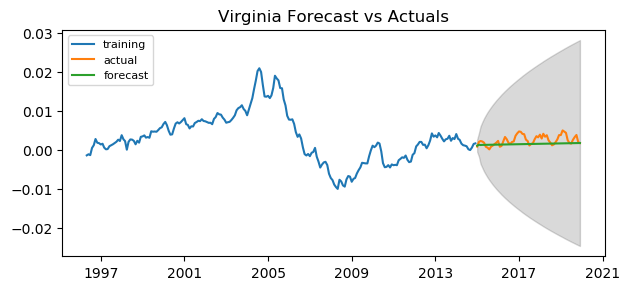

RMSE: 0.0015215386597704351
                             ARIMA Model Results                              
Dep. Variable:             D.Virginia   No. Observations:                  223
Model:                 ARIMA(1, 1, 2)   Log Likelihood                1269.634
Method:                       css-mle   S.D. of innovations              0.001
Date:                Tue, 10 Mar 2020   AIC                          -2529.267
Time:                        14:13:33   BIC                          -2512.231
Sample:                    06-01-1996   HQIC                         -2522.390
                         - 12-01-2014                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8.617e-06      0.000      0.074      0.941      -0.000       0.000
ar.L1.D.Virginia    -0.3529      0.065     -5.438      0.000      -0.480      -0.226


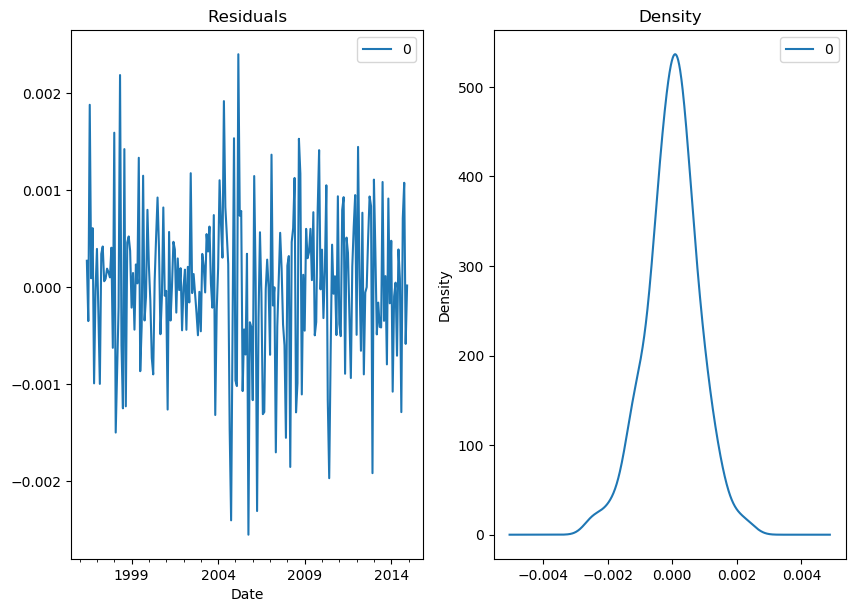

In [134]:
#forecastvalidation('District of Columbia',order=(1,1,2))
#forecastvalidation('California',order=(2,1,2))
#forecastvalidation('New York',order=(1,1,2))
#forecastvalidation('Florida',order=(2,0,1))
#forecastvalidation('Texas',order=(0,1,2))
forecastvalidation('Virginia',order=(1,1,2))

The residual shows no pattern and it is with zero mean.

#### 6. Final Forecasting

In [144]:
def predict_5years(state,order): # order = (2,1,1) etc
    
    model = ARIMA(df_monthly_returns[state].dropna(), order=order) 
    #model = statsmodels.tsa.statespace.sarimax.SARIMAX(train, order=(2,0,1), seasonal_order=(2,0,1,12))
    fitted = model.fit(disp=-1)  

    # Forecast next 5 years (Year 2020-2025)
    fc_5year = fitted.predict(start='2020-01',end='2025-01')
    
    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(df_monthly_returns[state])
    plt.plot(fc_5year, color='red')

    plt.title('Final Forecast of ' + state + ': Return for Next 5 Years')
    plt.show()
    

    # To calculate the housing price for 5 years from now
    final_price = df_zillow[state][-1] # (initial value)
    for i in fc_5year:
        final_price += i * final_price
        
    # Assume the current price is the last price of the dataset 
    current_price = df_zillow[state][-1] 
    
    print(state + ': ')
    print('current_price: ' + str(current_price) + '\t')
    print('final_price: ' + str(round(final_price,2)))
    print('Total return in 5 years is ' + str(round((final_price/current_price - 1) * 100,3)) + '%.')

/Users/derichong/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/derichong/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


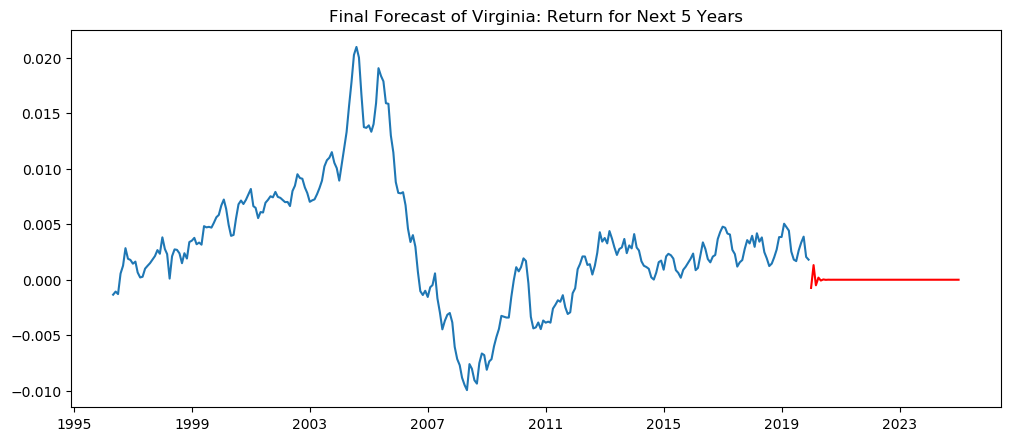

Virginia: 
current_price: 287898	
final_price: 288125.35
Total return in 5 years is 0.079%.


In [145]:
#predict_5years('District of Columbia',order=(1,1,2)) # 0.532%
#predict_5years('California',order = (2,1,2)) # 0.259%
#predict_5years('Florida',order = (2,0,1)) # 26.328%
#predict_5years('New York',order = (1,1,2)) # 0.245%
#predict_5years('Texas',order=(0,1,2)) # 0.032%
predict_5years('Virginia',order=(1,1,2)) # 0.079%

#### 7. Summary 

Total Return for 5 years: 

    1. Florida: 26.328%
    2. District of Columbia: 0.532%
    3. California: 0.259%
    4. New York: 0.245%
    5. Virginia: 0.079%
    6. Texas: 0.032%

After performing time series analysis on 6 states and foracasting total returns for up to 5 years, 
I recommend people who are interested in real estate investment can consider Florida based on its return.

However, this performance is solely based on its historic monthly returns. The past performance does not necessarily predict future outcomes. To achieve a better result, other external factors should be taken into account. 